In [20]:
# Facultatif: pour mettre votre notebook en pleine largeur écran:
from IPython.core.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline
from sklearn.datasets import load_breast_cancer
from torch import nn, optim
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [21]:
# Get data from Scikit learn
data = load_breast_cancer()
list(data.target_names)

['malignant', 'benign']

In [22]:
# Rename train and target data
data_train = data.data
data_target = data.target

In [23]:
# Create Arguments class with many parameters to be used 
class Arguments():
    def __init__(self):
        self.batch_size = 32
        self.test_batch_size = 32
        self.epochs = 100
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1
        self.save_model = False

args = Arguments()

use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)

device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

In [24]:
# Standardise data for input into Neural Net
scaler = StandardScaler()
transformed = scaler.fit_transform(data_train)

# Create a TensorDataset with features and target data
data_train = data_utils.TensorDataset(torch.tensor(transformed, requires_grad= True).float(),
                                 torch.tensor(data_target).float())
# Create a DataLoader to add minibatch and shuffle parameters
train_loader = torch.utils.data.DataLoader(
    data_train,
    batch_size=args.batch_size, shuffle=True, **kwargs)

In [26]:
class NetModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(NetModel, self).__init__() 
        # Calling Super Class's constructor
        # nn.linear is defined in nn.Module
        self.linear1 = nn.Linear(input_dim, 30)
        self.linear2 = nn.Linear(30, 30)
        self.linear3 = nn.Linear(30, 30)
        self.linear4 = nn.Linear(30, 1)
        self.sigmoid1 = nn.Sigmoid()
        self.relu1 = nn.ReLU()
        self.noise = GaussianNoise()
        
    def forward(self, x):
        # Here the forward pass is simply a linear function
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        out = self.sigmoid1(x)
        return out

# takes in a module and applies the specified weight initialization
def weights_init_uniform(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

input_dim = 30
output_dim = 1

model = NetModel(input_dim,output_dim)
model.apply(weights_init_uniform)

criterion = nn.BCELoss()# Binary Loss
optimiser = torch.optim.SGD(model.parameters(), lr = args.lr) #Stochastic Gradient Descent

epochs = args.epochs

In [28]:
# TRAINING
history = { "loss": [], "accuracy": [], "loss_val": [], "accuracy_val": [] }

for epoch in range(epochs):

    epoch +=1
    loss_accum = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimiser.zero_grad()

        pred = model(data)
        
        loss = criterion(pred,target)
        
        prediction = [1 if x > 0.5 else 0 for x in pred.data.numpy()]
        correct += (prediction == target.numpy()).sum()
        
        loss.backward()
        
        optimiser.step()
        
        loss_accum += float(loss)
            
    history["accuracy"].append(correct / len(train_loader.dataset)*100)
    history["loss"].append(loss_accum/len(train_loader.dataset)*100)        

    print('Total accuracy',history["accuracy"][-1], 'Total loss', history['loss'][-1])

/home/sacha/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/home/sacha/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Total accuracy 64.8506151142355 Total loss 2.172467861527508
Total accuracy 64.32337434094903 Total loss 2.157805757908075
Total accuracy 62.56590509666081 Total loss 2.142753228152364
Total accuracy 62.56590509666081 Total loss 2.129763773329857
Total accuracy 62.741652021089635 Total loss 2.1159819433684928
Total accuracy 62.741652021089635 Total loss 2.101699025853028
Total accuracy 62.741652021089635 Total loss 2.089051192590348
Total accuracy 62.741652021089635 Total loss 2.073913561229337
Total accuracy 62.741652021089635 Total loss 2.0598662968050614
Total accuracy 62.741652021089635 Total loss 2.0456901124575437
Total accuracy 62.741652021089635 Total loss 2.0298586578905478
Total accuracy 62.741652021089635 Total loss 2.012317995614452
Total accuracy 62.91739894551846 Total loss 1.9930145338256247
Total accuracy 62.91739894551846 Total loss 1.9763937524416746
Total accuracy 63.09314586994728 Total loss 1.9519712468232757
Total accuracy 63.79613356766256 Total loss 1.9267879910

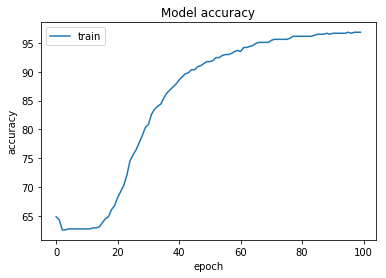

In [29]:
plt.plot(history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

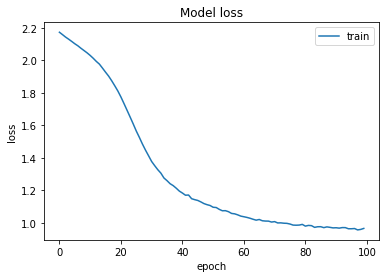

In [30]:
plt.plot(history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()